In [1]:
# fc_value = 0.0  # Replace with your actual value
import numpy as np
from matplotlib import pyplot as plt
from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import FOLPSTracerPowerSpectrumMultipoles, FOLPSRCTracerPowerSpectrumMultipoles,FOLPSRCMoTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood

kmin     = 0.008
kmax     = 0.2
binning  = 0.006
k_ev     = np.arange(kmin, kmax+0.001, binning)
klim     = {ell*2: (kmin,kmax,binning) for ell in range(2)}

# the cosmology parameters
redshift = 1.0
catalogue   = 'fiducial'  # fiducial, Mnu_p, Mnu_ppp -- QUIJOTE catalogue
cosmology   = 'LCDM'  # LCDM, nuCDM, nsFree, wCDM -- cosmology model
r_pk        = 'RSD'  # RSD, LRG, QSQ, CATAS-- systematics
CovRsf      = 100  # -- covariance rescale factor

cosmo = DESI()
print("Cosmology object created.")

# Initialize template
template = DirectPowerSpectrumTemplate(z=redshift, apmode='qisoqap', fiducial='DESI')

model= 'FOLPSRCMo'
if model == 'FOLPS':
    theory  = FOLPSTracerPowerSpectrumMultipoles(template=template, k=k_ev)
elif model =='FOLPSRC':
    theory = FOLPSRCTracerPowerSpectrumMultipoles(template=template, k=k_ev)
elif model == 'FOLPSRC_fix':
    theory = FOLPSRCTracerPowerSpectrumMultipoles(template=template, k=k_ev)
    theory.varied_params['fc'].update(fixed=True, value=0.05)
elif model == 'FOLPSRCMo':
    theory = FOLPSRCMoTracerPowerSpectrumMultipoles(template=template, k=k_ev)
print(theory)
print("All Parameters:", theory.all_params)
print("Varied Parameters:", theory.varied_params)
print(theory(fc=0.05))

# import os
# filename = []
# # filedir = '/home/astro/shhe/projectNU/main/data/halos_kbin0.05/fiducial/RSD_z0.5/npy/'
# filedir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/{catalogue}/{r_pk}_z{redshift}/npy/'
# for file in os.listdir(filedir):
#     filename.append(filedir+file)
# covariance = filedir+'*'
# observable = TracerPowerSpectrumMultipolesObservable(data= filename,
#                                                     covariance= covariance,
#                                                     klim=klim,
#                                                     theory=theory,
#                                                     # kin=np.arange(0.001,0.35,0.002)
#                                                     )
# likelihood = ObservablesGaussianLikelihood(observable, scale_covariance = 1/CovRsf) #
# likelihood()

[Macpomme.local:57027] shmem: mmap: an error occurred while determining whether or not /var/folders/n0/gs1g7p590qg7trf8pp8w29ch0000gn/T//ompi.Macpomme.501/jf.0/2551644160/sm_segment.Macpomme.501.98170000.0 could be created.


Cosmology object created.
All Parameters: ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'b1', 'b2', 'bs', 'b3', 'alpha0', 'alpha2', 'alpha4', 'ct', 'sn0', 'sn2', 'fc', 'c1'])
Varied Parameters: ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'fc', 'c1'])
[[21381.41433152 26023.50563519 25815.0850667  23247.33800854
  19985.23732492 17010.01025563 14724.47773487 13139.35517528
  12063.67465674 11247.55229993 10477.91196346  9636.03696553
   8712.02809129  7774.71763497  6917.26306316  6209.13986183
   5673.99456937  5292.51505118  5018.64761062  4797.86742682
   4583.31803069  4347.64127441  4087.05264881  3816.22037441
   3557.21878659  3328.69236623  3139.69781748  2989.09677067
   2868.54480807  2766.55648967  2672.48433004  2578.30265372
   2480.82681946]
 [14239.78181233 17270.03212892 17053.34206511 15278.13263384
  13067.29463692

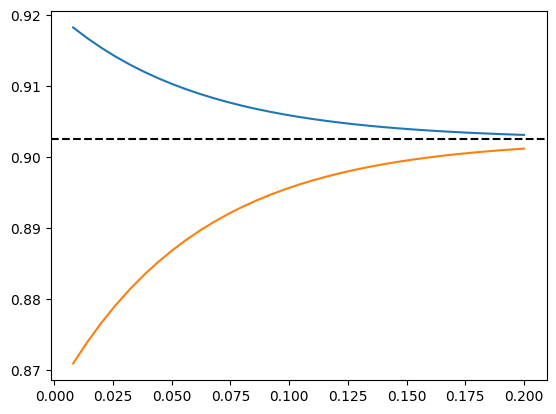

In [5]:
from desilike.emulators import EmulatedCalculator, Emulator, TaylorEmulatorEngine

emulator_fn = f'./emulators/emulator_fiducial_z1.0.npy'

theory = FOLPSRCMoTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
# plt.plot(k_ev,k_ev*(theory(fc=0.00,c1=0.0)[0]), color ='black')

plt.axhline(y=(1-0.05)**2, color ='black', ls='--')
# plt.plot(k_ev, (theory(fc=0.05, c1=0.01)[0])/ (theory(fc=0.00,c1=0.0)[0]))

plt.plot(k_ev, (theory(fc=0.05,c1=-0.02)[0])/ (theory(fc=0.00,c1=0.0)[0]), label= 'c1=-0.02')
# plt.plot(k_ev, (theory(fc=0.05,c1=0.0)[1])/ (theory(fc=0.00,c1=0.0)[1]))
plt.plot(k_ev, (theory(fc=0.05,c1=0.04)[1])/ (theory(fc=0.00,c1=0.0)[1]), label= 'c1=+0.04')



/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/5%CATAS_z1.0/fiducial_199_z1.0.pk


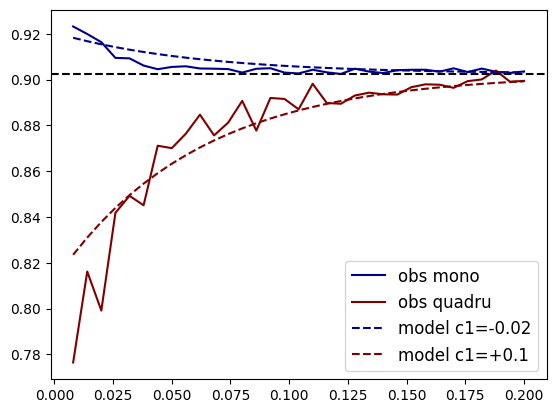

In [22]:
label_fontsize = 12
legend_fontsize = 16

def dataload(data):
    Pk0 = [[],[]]
    Pk2 = [[],[]]
    k = data[0,:,1]
    l0 = data[:,:,3]
    l2 = data[:,:,4]
    Pk0[0] = np.mean(l0,axis=0)
    Pk0[1] = np.std(l0,axis=0)
    Pk2[0] = np.mean(l2,axis=0)
    Pk2[1] = np.std(l2,axis=0)
    pk_cov = np.append(l0,l2,axis=1)
    cov = np.cov(np.array(pk_cov).T)
    # icov = np.linalg.inv(cov)
    return (k,Pk0,Pk2, cov)

def Pkload(catalogue, type, r_pk, redshift):
    # load the QUIJOTE observation
    tool = 'Pypower' # Powspec, Pypower, NCV
    Ddir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/{type}/{r_pk}_z{redshift}'
    data = []
    nb = np.arange(100,200,1)
    for h in nb:
        if type == 'fiducial':
            realisation=np.loadtxt(Ddir+f'/pk/{catalogue}_{h}_z{redshift}.pk')
        elif type == 'cross_pkl':
            realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        elif type == 'auto_pkl':
            realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        data.append(realisation)
    print(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
    (kev, pk0, pk2, icov) = dataload(np.array(data))
    pkl = [kev, pk0, pk2, icov]
    return pkl

[k_ev, pk0, pk2, cov] = Pkload('fiducial', 'fiducial','RSD', 1.0)
[k_ev, pk0_catas, pk2_catas, cov] = Pkload('fiducial', 'fiducial','5%CATAS', 1.0)

plt.plot(k_ev, pk0_catas[0]/(pk0[0]), color = 'darkblue',label='obs mono')
plt.plot(k_ev, pk2_catas[0]/(pk2[0]), color = 'maroon',label='obs quadru')

plt.axhline(y=(1-0.05)**2, color ='black', ls='--')
plt.plot(k_ev, (theory(fc=0.05,c1=-0.02)[0])/ (theory(fc=0.00,c1=0.0)[0]), color = 'darkblue',label= 'model c1=-0.02', ls='--')
plt.plot(k_ev, (theory(fc=0.05,c1=0.1)[1])/ (theory(fc=0.00,c1=0.0)[1]), color = 'maroon',  label= 'model c1=+0.1', ls='--')
plt.legend(fontsize=label_fontsize)
